In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os
import sys
sys.path.append('..')
from Sequence import Sequence

from matplotlib.patches import Rectangle
from skimage import io
import cv2
from CarSequence import CarSequence
import threading

In [2]:
video_file = '/home/bendafe/data/merlin/annotated/videos/Sensity_USA_Sacramento_N0566604c-0126181700-0_TrafficAndParking.ts'
xml_file = '/home/bendafe/data/merlin/annotated/Sensity_USA_Sacramento_N0566604c-0126181700-0_TrafficAndParking.xml'

In [3]:
cars = CarSequence.parse_xml(xml_file, video_file)

In [4]:
car = cars[0]
car.read_frames()

In [5]:
def conv_to_rect(data, color='r'):
    return Rectangle(
            xy=(data.x, data.y),
            width=data.width,
            height=data.height,
            facecolor='none',
            edgecolor=color,
        )

In [6]:
def plot_frame(frame, rectangles):
    plt.figure(figsize=(40, 18))
    ax = plt.subplot(111)

    for rect in rectangles:
        ax.add_patch(rect)
        
    plt.imshow(frame)
#     plt.title('Total frame: %d, current: %d' % (len(sequence._images), 
#                                                 sequence._frame+1))

In [7]:
def loss(region, region_gt):
    pos = [region.y + region.height / 2, region.x + region.width / 2]
    pos_gt = [region_gt.y + region_gt.height / 2, region_gt.x + region_gt.width / 2]
    return (np.abs(pos[0] - pos_gt[0]) + np.abs(pos[1] - pos_gt[1])) / 2

11.25
21.91919999999999
31.547999999999988
45.946999999999974
61.11619999999995
74.29619999999997
84.54619999999997
96.04619999999997
108.29619999999997
124.81580784313724
140.3934702806613
155.93268596693576
168.4521015763168
181.7021015763168
193.74093279507883
211.24093279507883
227.49093279507883
244.26034840445985
257.5103484044598
271.2603484044598


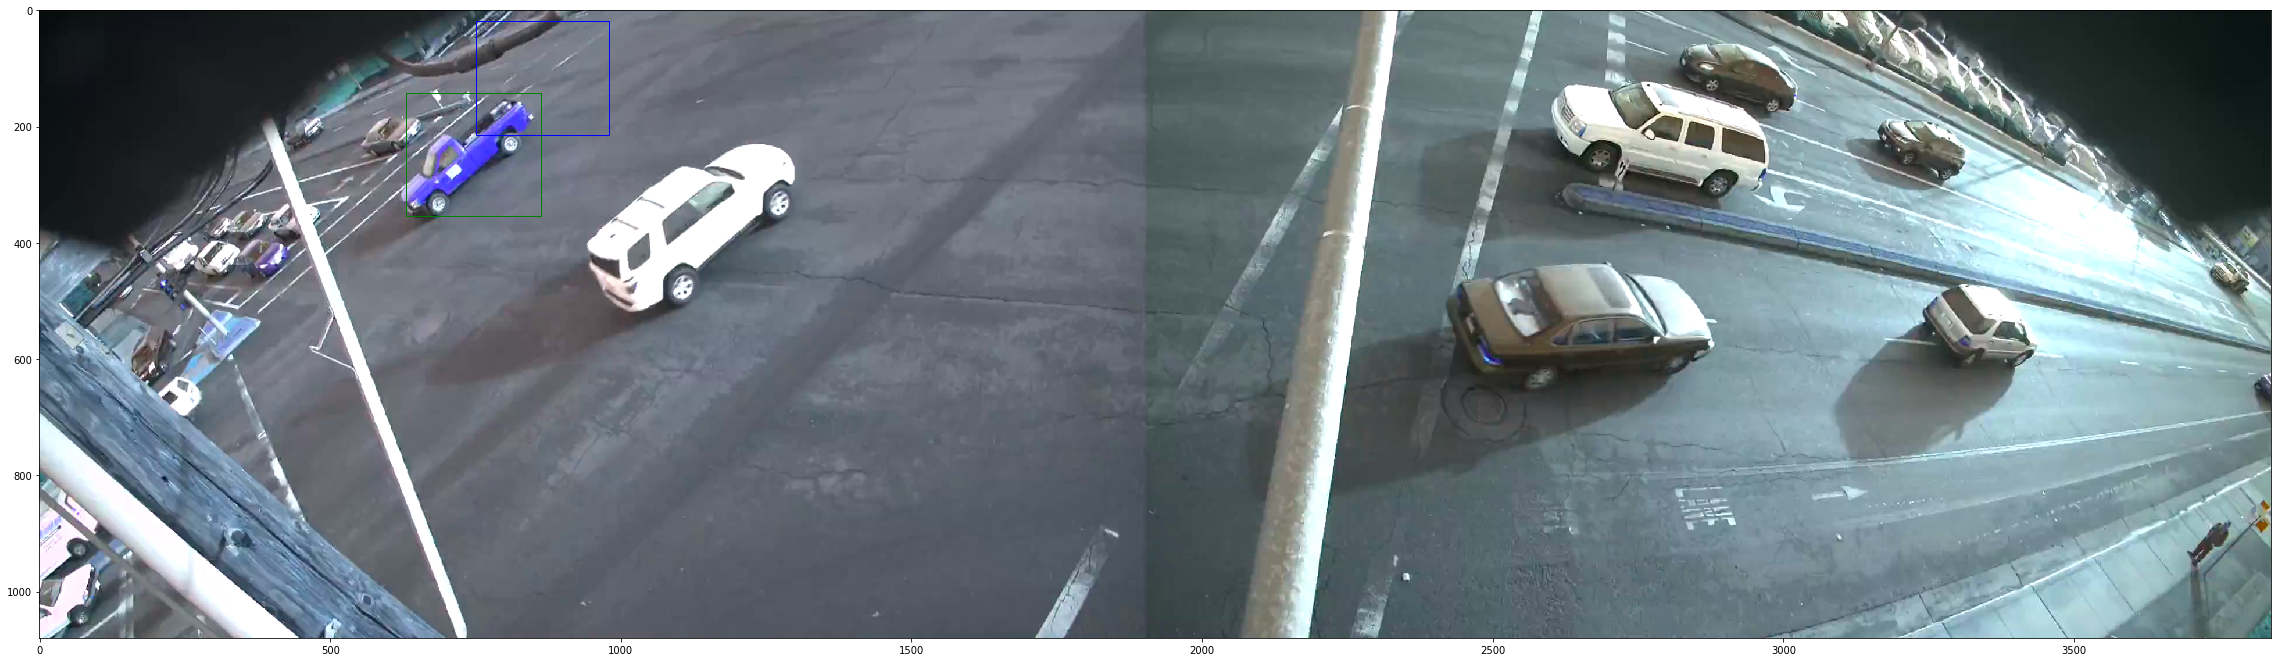

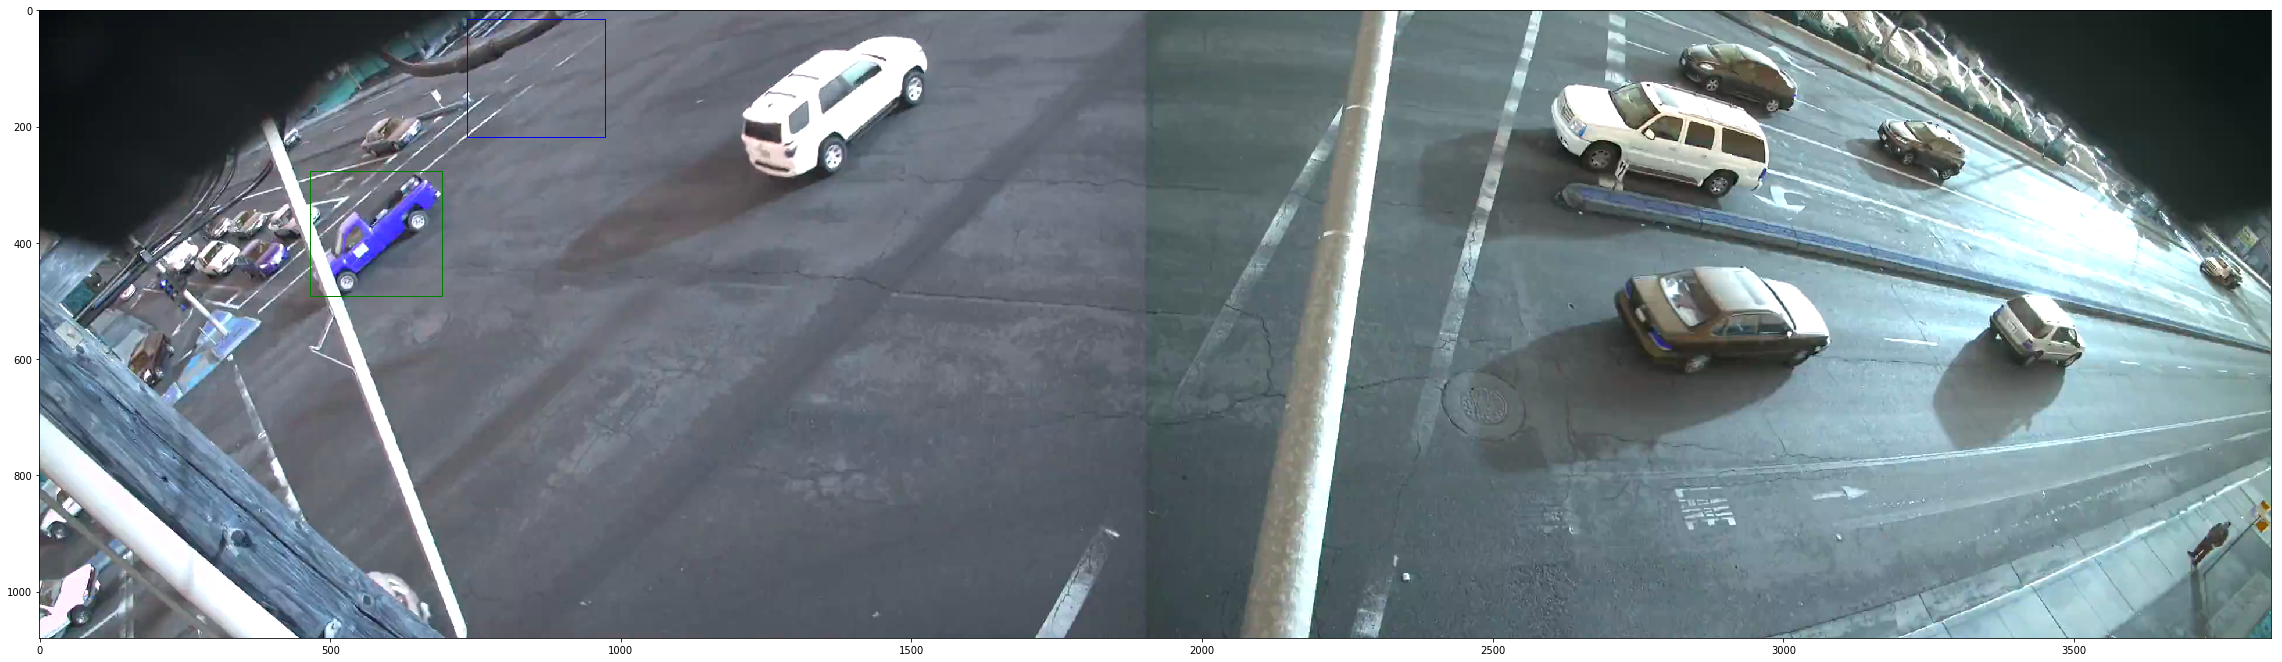

In [11]:
# from KCFtracker import KCFtracker
from fDSSTtracker import DSSTtracker
# from HCFtracker import HCFtracker
car.reset()
car.next()
region = car.get_rectangle()
# kcf_tracker = KCFtracker(car.get_frame(), region)
dsst_tracker = DSSTtracker(car.get_frame(), region, output_sigma_factor=.5, learning_rate=0.5)
# hcf_tracker = HCFtracker(car.get_frame(), region)

fig_num = 0
while car.next():
    
    img = car.get_frame()
    
#     data_kcf_tr = kcf_tracker.track(img)
    data_dsst_tr = dsst_tracker.track(img)
    data_gt = car.get_rectangle()
    print(loss(data_dsst_tr, data_gt))
#     data_hcf_tr = hcf_tracker.track(img)
    
    if car.get_frame_num() % 10 == 0:
        
        rectangles = []
        rectangles.append(conv_to_rect(data_gt, 'g'))
#         rectangles.append(conv_to_rect(data_kcf_tr, 'r'))
        rectangles.append(conv_to_rect(data_dsst_tr, 'b'))
#         rectangles.append(conv_to_rect(data_hcf_tr, 'k'))
        
        threading.Thread(target=plot_frame, args=(img, rectangles)).start()
        fig_num += 1
        
    if fig_num >= 10:
        break